In [1]:
import earthkit.data
import earthkit.plots

In [2]:
data = earthkit.data.from_source(
    'cds',
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': '2024',
        'month': '04',
        'day': '20',
        'time': '12:00',
    },
)

meridional_mean = data.to_xarray().mean("longitude").squeeze()
zonal_mean = data.to_xarray().mean("latitude").squeeze()

In [3]:
meridional_mean

<xarray.Dataset>
Dimensions:     (latitude: 721)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2024-04-20T12:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    valid_time  datetime64[ns] ...
Data variables:
    t2m         (latitude) float32 255.6 255.9 255.9 255.9 ... 218.3 218.2 218.1

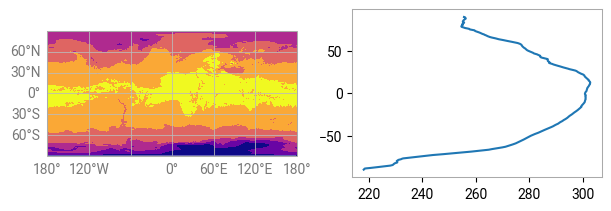

In [12]:
figure = earthkit.plots.Figure(columns=2, size=(6, 2))

figure.add_map().block(data)
figure.add_subplot().line(meridional_mean, y="latitude", x="t2m")

figure[0].gridlines()

figure.show()